1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


2.Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [2]:
pivot_table = pd.pivot_table(df, index=['race', 'signs_of_mental_illness'], aggfunc='size').unstack(fill_value=0)

pivot_table

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [8]:
pivot_table['percentage_with_mental_illness'] = pivot_table.apply(lambda row: (row[True] / (row[True] + row[False])) * 100, axis=1)


most_mental_illness_race = pivot_table['percentage_with_mental_illness'].idxmax()
max_percentage_mental_illness = pivot_table['percentage_with_mental_illness'].max()

print("Rasa charakteryzująca się największym odsetkiem znamion choroby psychicznej: ", most_mental_illness_race)
print("Największy odsetek znamion choroby psychicznej: ", max_percentage_mental_illness)


Rasa charakteryzująca się największym odsetkiem znamion choroby psychicznej:  W
Największy odsetek znamion choroby psychicznej:  28.796445880452342


4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

Text(0.5, 1.0, 'Liczba interwencji według dnia tygodnia')

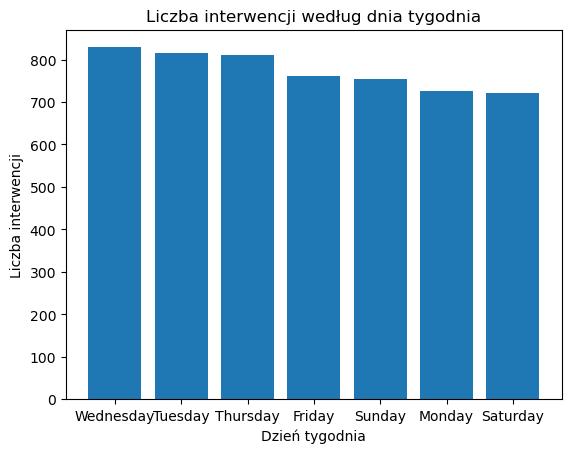

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].apply(lambda x: x.day_name())
interventions_by_day = df['day_of_week'].value_counts()

plt.bar(interventions_by_day.index, interventions_by_day)
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba interwencji')
plt.title('Liczba interwencji według dnia tygodnia')

5.Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów.

In [14]:
population_data = pd.read_csv('dane1.csv')
state_codes_data = pd.read_csv('dane2.csv')
state_codes_data.columns = state_codes_data.iloc[1]
state_codes_data = state_codes_data[2:]
state_codes_data.rename(columns={state_codes_data.columns[0]: 'State'}, inplace=True)
df.rename(columns={'state': 'USPS'}, inplace=True)

Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [16]:
merged_data = pd.merge(state_codes_data, population_data, on='State', how='left')

count1 = df['USPS'].value_counts().reset_index()
count1.columns = ['USPS', 'count']

merged_data1 = pd.merge( merged_data, count1, on='USPS', how='left')

merged_data1['population'] = merged_data1['population'].str.replace(',', '')
merged_data1['incidents_per_1000'] = (merged_data1['count'] / merged_data1['population'].astype(int)) * 1000

print(merged_data1[['State','incidents_per_1000']])

                       State  incidents_per_1000
0                   Nebraska                 NaN
1   Northern Mariana Islands                 NaN
2                    Alabama            0.020699
3                     Alaska            0.053178
4                    Arizona            0.035517
5                   Arkansas            0.027561
6                 California            0.020208
7                   Colorado            0.033774
8                Connecticut            0.005824
9                   Delaware            0.013132
10      District of Columbia            0.018853
11                   Florida            0.016250
12                   Georgia            0.016990
13                    Hawaii            0.020615
14                     Idaho            0.022837
15                  Illinois            0.008117
16                   Indiana            0.014000
17                      Iowa            0.010030
18                    Kansas            0.017019
19                  